Source : https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

# K nearest Neighbour

Supervised classification model to assign a class to new data point

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# column names
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# species represented as integers
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# Name of the target
print(iris.target_names)

# so we get 0 : setosa, 1 : versicolor and 3 : virginica

['setosa' 'versicolor' 'virginica']


In [9]:
# Printing out the data
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [10]:
# Dataset Shape
print(iris.data.shape)

(150, 4)


**Convert the SciKit object into pandas**

In [11]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Splitting Data & Training Model

Classifying the "target" 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# data
X = iris.data
# target to classify
y = iris.target

In [15]:
# Setting up the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [16]:
#Comparing the training and testing sets shape
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


# Using the KNN model to fit the data 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

### Training the data

Starting the algorithm with k = 4 

In [18]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### Prediction

In [19]:
yhat = neigh.predict(X_test)
yhat[:5]

array([2, 0, 2, 2, 2])

### Accuracy

Evaluating the accuracy of the model when k = 4

In [20]:
from sklearn import metrics

In [21]:
print('Train Accuracy : ',metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train Accuracy :  0.975
Test set Accuracy:  0.9666666666666667


### Accuracy  range

Evaluating the accuracy of the model following a range of Ks

In [22]:
Ks = 10
mean_acc = np.zeros((Ks - 1))
print(mean_acc)
std_acc = np.zeros((Ks - 1))
print(std_acc)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
      
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.93333333, 0.93333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667])

### Plotting model accuracy

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

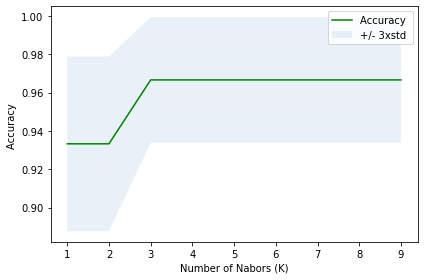

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()